___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model.***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Leraning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [7]:
# Import TensorFlow library
import tensorflow as tf

# Check if GPUs are available
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # If GPUs are available, set memory growth to True
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("GPUs available:", gpus)
else:
    print("No GPUs detected.")

# Note: If you're using Colab, GPUs are usually available by default.

# Optional: You can check the details of GPU devices using the following line:
# print("All devices: ", tf.config.list_logical_devices('GPU'))



No GPUs detected.


In [9]:
# Import TensorFlow library
import tensorflow as tf

# Check if GPUs are available
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # If GPUs are available, create a MirroredStrategy for distributed training on GPUs
    strategy = tf.distribute.MirroredStrategy()
    print("Number of GPUs: {}".format(strategy.num_replicas_in_sync))
else:
    print("No GPUs detected.")
    # If GPUs are not available, fall back to the default strategy
    strategy = tf.distribute.get_strategy()

# Now you can use `strategy` for distributed training with GPUs or the default strategy.


No GPUs detected.


In [10]:
# Import necessary modules from NLTK for text processing
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Import warnings module to filter out warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Import NLTK for natural language processing functionalities
import nltk

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations
import numpy as np


In [11]:
# Download NLTK resources for text processing
nltk.download("punkt")      # Downloads the Punkt tokenizer models for sentence and word tokenization
nltk.download('stopwords')  # Downloads stopwords that can be filtered out in text processing
nltk.download('wordnet')    # Downloads the WordNet lexical database for lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
# Read a CSV file into a pandas DataFrame and display the first few rows
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")  # Reads the CSV file into the DataFrame 'df'
df.head()  # Displays the first few rows of the DataFrame


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

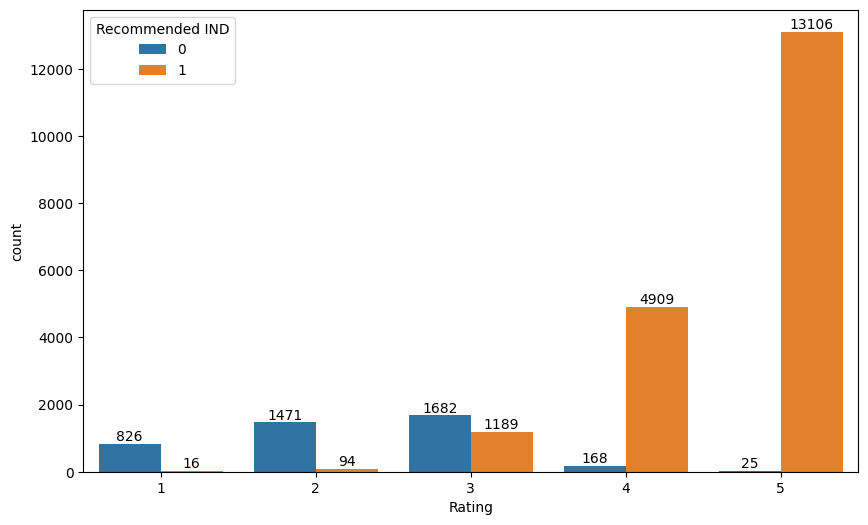

In [13]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a count plot using Seaborn
ax = sns.countplot(x="Rating", data=df, hue="Recommended IND")

# Add labels to the bars in the count plot
for container in ax.containers:
    ax.bar_label(container)


In [14]:
# Extract unique values from the "Recommended IND" column of the DataFrame
unique_recommendations = df["Recommended IND"].unique()

# Display the unique values
print(unique_recommendations)


[1 0]


In [15]:
# Exclude rows where Rating is 1 and Recommended IND is 1
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]

# Exclude rows where Rating is 2 and Recommended IND is 1
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]

# Exclude rows where Rating is 3 and Recommended IND is 1
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]

# Exclude rows where Rating is 4 and Recommended IND is 0
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]

# Exclude rows where Rating is 5 and Recommended IND is 0
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]


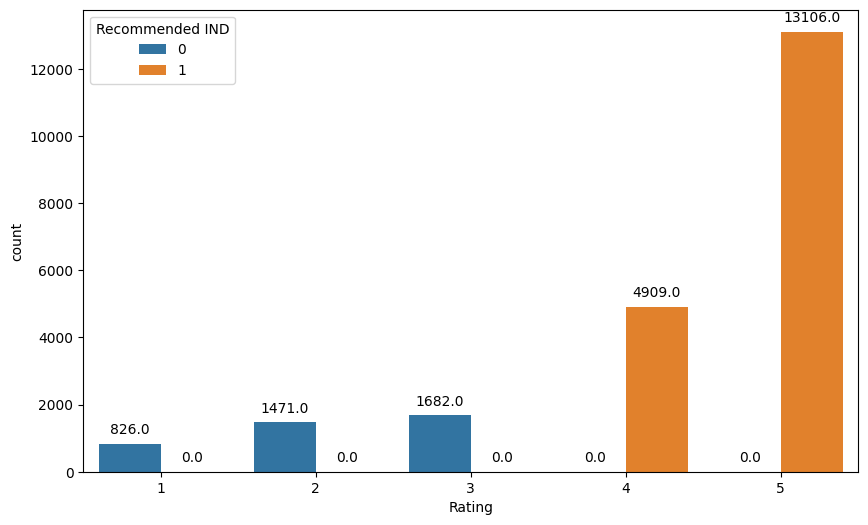

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a countplot with Rating on the x-axis, colored by Recommended IND
ax = sns.countplot(x="Rating", data=df, hue="Recommended IND")

# Add labels at the center of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Show the plot
plt.show()


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

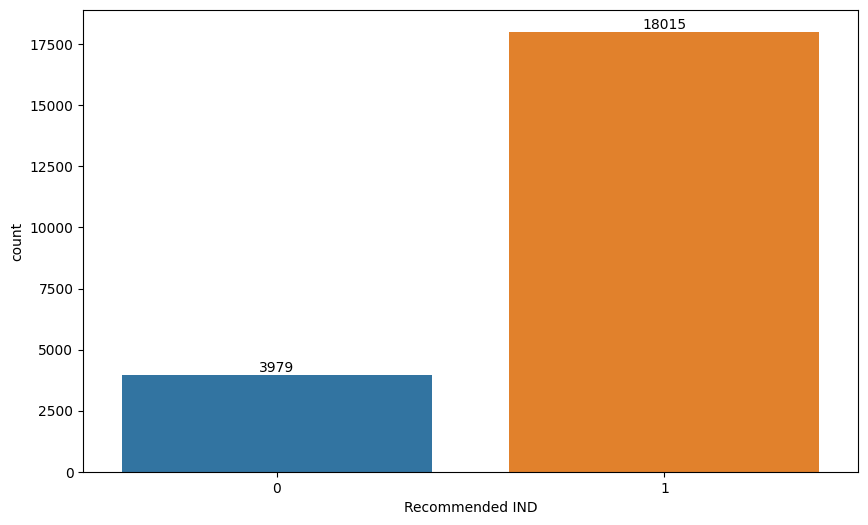

In [17]:
# Set the size of the figure
plt.fig = plt.figure(figsize=(10, 6))

# Create a countplot for "Recommended IND" column
ax = sns.countplot(x="Recommended IND", data=df)

# Add labels at the top of each bar with the count information
ax.bar_label(ax.containers[0])

# Display the plot
plt.show()


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [18]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [19]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [20]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [21]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [22]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


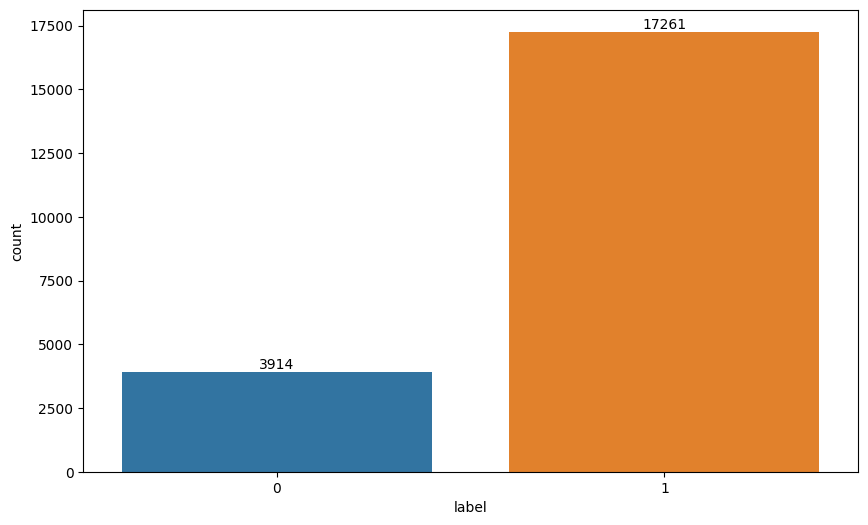

In [23]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [24]:
stop_words = stopwords.words('english')

In [25]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [26]:
# Filter sentences labeled as positive (label == 1) from the "text" column
positive_sentences = df[df["label"] == 1]["text"]

# Apply the cleaning function to preprocess the positive sentences
positive_sentences = positive_sentences.apply(cleaning)

# Display the preprocessed positive sentences
positive_sentences


0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [27]:
# Filter sentences labeled as negative (label == 0) from the "text" column
negative_sentences = df[df["label"] == 0]["text"]

# Apply the cleaning function to preprocess the negative sentences
negative_sentences = negative_sentences.apply(cleaning)

# Display the preprocessed negative sentences
negative_sentences


2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
20       first pullover styling side zipper wouldnt pur...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [28]:
# Combine preprocessed positive sentences into a single string
positive_words = " ".join(positive_sentences)

# Display the first 100 characters of the combined positive words
positive_words[:100]


'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [29]:
# Combine preprocessed negative sentences into a single string
negative_words = " ".join(negative_sentences)

# Display the first 100 characters of the combined negative words
negative_words[:100]


'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [30]:
# Import WordCloud module for creating word clouds
from wordcloud import WordCloud

In [31]:
# Create a WordCloud object for positive words with specified parameters
wordcloud_positive = WordCloud(background_color="white", max_words=250)

In [32]:
# Generate a word cloud for positive words using the WordCloud object
wordcloud_positive.generate(positive_words)

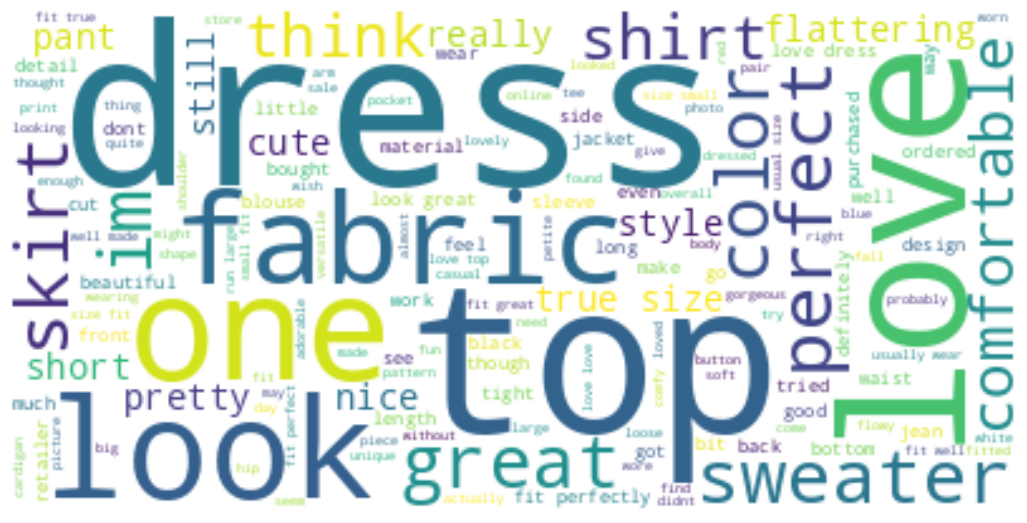

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set the size of the figure for positive word cloud
plt.figure(figsize=(13, 13))

# Create and generate the word cloud for positive words directly
wordcloud_positive = WordCloud(background_color="white", max_words=250).generate(positive_words)

# Display the word cloud using imshow
plt.imshow(wordcloud_positive, interpolation="bilinear")

# Turn off axis labels for better visualization
plt.axis("off")

# Show the positive word cloud
plt.show()


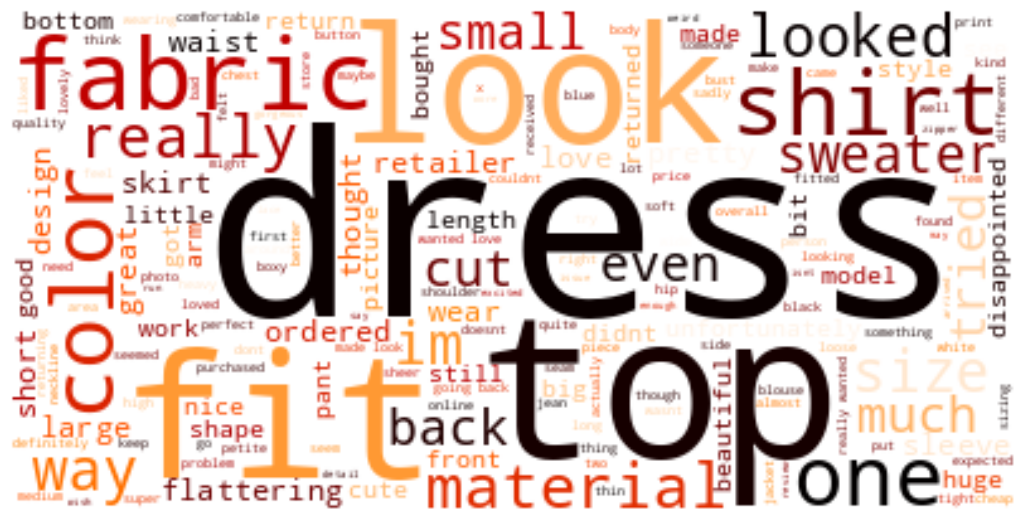

In [34]:
# Create a WordCloud object for negative words with specified parameters
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

# Generate a word cloud for negative words using the WordCloud object
wordcloud_negative.generate(negative_words)

# Set the size of the figure for displaying the word cloud
plt.figure(figsize=(13, 13))

# Display the word cloud using imshow with interpolation
plt.imshow(wordcloud_negative, interpolation="bilinear")

# Turn off axis labels for better visualization
plt.axis("off")

# Show the generated word cloud
plt.show()


## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**
**For BERT model, use TF tensor.**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [35]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [36]:
# Extract the feature (X) and target (y) values for model training
X = df["text"].values  # Assuming "text" is the feature column
y = df["label"].map({0: 1, 1: 0}).values  # Assuming "label" is the target column; Mapping 0 to 1 and 1 to 0

# Display the shapes of the feature and target arrays
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (21175,)
Shape of y: (21175,)


In [37]:
# Perform train-test split with a specified test_size and stratified sampling
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# Display the shapes of the resulting train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (16940,)
Shape of X_test: (4235,)
Shape of y_train: (16940,)
Shape of y_test: (4235,)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [38]:
# Import CountVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# The CountVectorizer is used to convert a collection of text documents to a matrix of token counts


In [39]:
# Create a CountVectorizer with specified parameters
# preprocessor is set to the 'cleaning' function, and min_df is set to 3
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)

# Apply the CountVectorizer to transform the training data
X_train_count = vectorizer.fit_transform(X_train)

# Apply the CountVectorizer to transform the testing data
X_test_count = vectorizer.transform(X_test)


In [40]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Create a TfidfVectorizer with specified parameters
# preprocessor is set to the 'cleaning' function, and min_df is set to 3
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)

# Apply the TfidfVectorizer to transform the training data
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)

# Apply the TfidfVectorizer to transform the testing data
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)


In [44]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eval functions

In [46]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [47]:
# Define a function to evaluate the model on training and testing sets
def eval(model, X_train, X_test):
    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Make predictions on the training set
    y_pred_train = model.predict(X_train)

    # Print confusion matrix for the testing set
    print("Confusion Matrix (Test Set):")
    print(confusion_matrix(y_test, y_pred))

    # Print classification report for the testing set
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print classification report for the training set
    print("Train Set Classification Report:")
    print(classification_report(y_train, y_pred_train))


## Logistic Regression

### CountVectorizer

In [48]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with specified parameters
# C is set to 0.01, max_iter is set to 1000, class_weight is set to "balanced"
# random_state is set for reproducibility
log = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)

# Train the Logistic Regression model using the CountVectorizer transformed training data
log.fit(X_train_count, y_train)


LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [49]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
Confusion Matrix (Test Set):
[[2990  462]
 [ 108  675]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.59      0.86      0.70       783

    accuracy                           0.87      4235
   macro avg       0.78      0.86      0.81      4235
weighted avg       0.90      0.87      0.87      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [50]:
# Import necessary modules for cross-validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Define scoring metrics for cross-validation
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

# Create a Logistic Regression model with specified parameters
# C is set to 0.01, max_iter is set to 1000, class_weight is set to "balanced"
# random_state is set for reproducibility
model = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)

# Perform cross-validation with the logistic regression model
# using the CountVectorizer transformed training data and defined scoring metrics
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)

# Create a DataFrame to store the cross-validation scores
df_scores = pd.DataFrame(scores, index=range(1, 11))

# Display the mean scores for accuracy, precision, recall, and F1-score
df_scores.mean()[2:]


test_accuracy       0.870956
test_precision-1    0.606213
test_recall-1       0.863305
test_f1-1           0.712183
dtype: float64

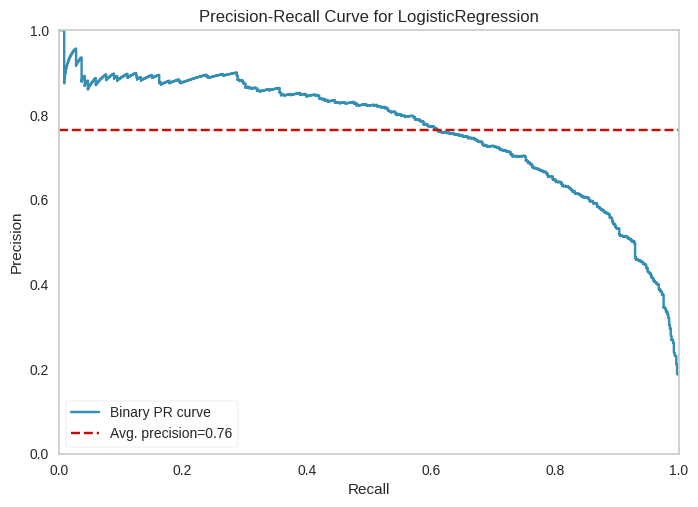

In [51]:
# Import PrecisionRecallCurve from yellowbrick.classifier
from yellowbrick.classifier import PrecisionRecallCurve

# Create a PrecisionRecallCurve visualization for a Logistic Regression model
# with specified parameters
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)

# Fit the PrecisionRecallCurve visualization on the training data
viz.fit(X_train_count, y_train)

# Score the PrecisionRecallCurve visualization on the testing data
viz.score(X_test_count, y_test)

# Display the Precision-Recall Curve visualization
viz.show();


In [52]:
# Make predictions on the testing set using the Logistic Regression model
y_pred = log.predict(X_test_count)

# Obtain the average precision (AP) score from the Precision-Recall Curve visualization
log_AP_count = viz.score_

# Calculate the recall score for the Logistic Regression model on the testing set
log_count_rec = recall_score(y_test, y_pred)

# Calculate the F1 score for the Logistic Regression model on the testing set
log_count_f1 = f1_score(y_test, y_pred)


### TF-IDF

In [53]:
# Create a Logistic Regression model with specified hyperparameters
# C is set to 0.06, max_iter is set to 1000, class_weight is set to "balanced"
# random_state is set for reproducibility
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")

# Train the Logistic Regression model using the TfidfVectorizer transformed training data
log.fit(X_train_tf_idf, y_train)


LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [54]:
# Print information about the Logistic Regression model
print("LOG MODEL")

# Evaluate the Logistic Regression model on the training and testing sets
eval(log, X_train_tf_idf, X_test_tf_idf)


LOG MODEL
Confusion Matrix (Test Set):
[[2961  491]
 [  95  688]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3452
           1       0.58      0.88      0.70       783

    accuracy                           0.86      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.86      0.87      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.61      0.90      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.79      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [55]:
# Create a Logistic Regression model with specified hyperparameters
# C is set to 0.06, max_iter is set to 1000, class_weight is set to "balanced"
# random_state is set for reproducibility
model = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")

# Perform cross-validation with the logistic regression model
# using the TfidfVectorizer transformed training data and defined scoring metrics
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)

# Create a DataFrame to store the cross-validation scores
df_scores = pd.DataFrame(scores, index=range(1, 11))

# Display the mean scores for accuracy, precision, recall, and F1-score
df_scores.mean()[2:]


test_accuracy       0.867532
test_precision-1    0.596356
test_recall-1       0.879277
test_f1-1           0.710588
dtype: float64

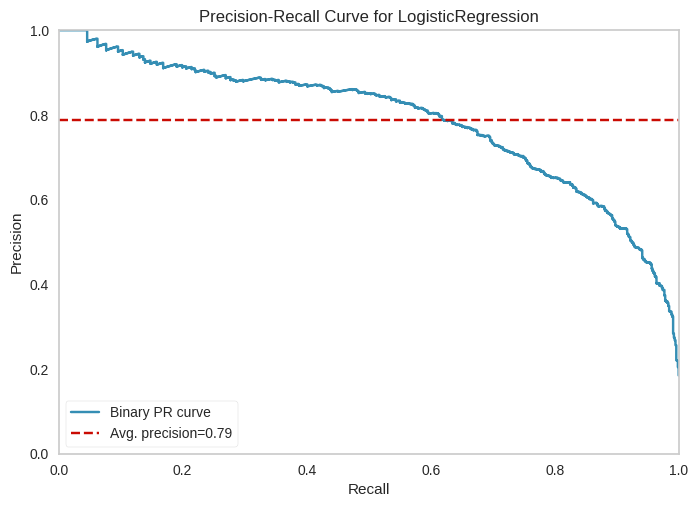

In [56]:
# Create a Precision-Recall Curve visualization for a Logistic Regression model
# with specified hyperparameters
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)

# Fit the Precision-Recall Curve visualization on the TfidfVectorizer transformed training data
viz.fit(X_train_tf_idf, y_train)

# Score the Precision-Recall Curve visualization on the TfidfVectorizer transformed testing data
viz.score(X_test_tf_idf, y_test)

# Display the Precision-Recall Curve visualization
viz.show();


In [57]:
# Make predictions on the testing set using the Logistic Regression model with TfidfVectorizer
y_pred = log.predict(X_test_tf_idf)

# Obtain the average precision (AP) score from the Precision-Recall Curve visualization
log_AP_tfidf = viz.score_

# Calculate the recall score for the Logistic Regression model on the testing set with TfidfVectorizer
log_tfidf_rec = recall_score(y_test, y_pred)

# Calculate the F1 score for the Logistic Regression model on the testing set with TfidfVectorizer
log_tfidf_f1 = f1_score(y_test, y_pred)


## Naive Bayes

### Countvectorizer

In [68]:
# Import MultinomialNB and BernoulliNB from sklearn.naive_bayes
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Create a Multinomial Naive Bayes model with specified hyperparameters
# Alpha is set to 0.7 to control additive (Laplace/Lidstone) smoothing
nb = MultinomialNB(alpha=0.7)

# Train the Multinomial Naive Bayes model using the CountVectorizer transformed training data
nb.fit(X_train_count, y_train)


MultinomialNB(alpha=0.7)

In [69]:
# Print information about the Naive Bayes model
print("NB MODEL")

# Evaluate the Naive Bayes model on the training and testing sets
eval(nb, X_train_count, X_test_count)


NB MODEL
Confusion Matrix (Test Set):
[[3227  225]
 [ 162  621]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.73      0.79      0.76       783

    accuracy                           0.91      4235
   macro avg       0.84      0.86      0.85      4235
weighted avg       0.91      0.91      0.91      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13809
           1       0.75      0.86      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.90      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [70]:
# Create a Multinomial Naive Bayes model with specified hyperparameters
# Alpha is set to 0.7 to control additive (Laplace/Lidstone) smoothing
model = MultinomialNB(alpha=0.7)

# Perform cross-validation with the Multinomial Naive Bayes model
# using the CountVectorizer transformed training data and defined scoring metrics
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)

# Create a DataFrame to store the cross-validation scores
df_scores = pd.DataFrame(scores, index=range(1, 11))

# Display the mean scores for accuracy, precision, recall, and F1-score
df_scores.mean()[2:]


test_accuracy       0.903896
test_precision-1    0.715647
test_recall-1       0.797831
test_f1-1           0.754327
dtype: float64

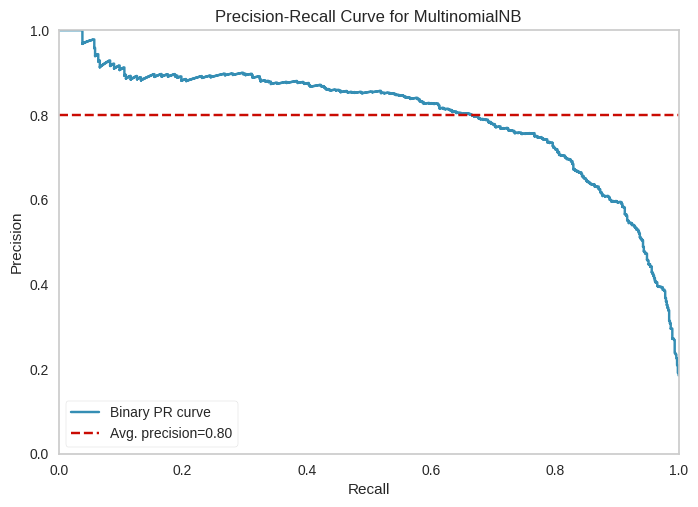

In [71]:
# Create a Precision-Recall Curve visualization for a Multinomial Naive Bayes model
# with specified hyperparameters
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=0.7),
    classes=nb.classes_,  # Use classes from a previously defined Naive Bayes model
    per_class=True,       # Plot individual precision-recall curves for each class
    cmap="Set1"           # Set the color map for class differentiation
)

# Fit the Precision-Recall Curve visualization on the CountVectorizer transformed training data
viz.fit(X_train_count, y_train)

# Score the Precision-Recall Curve visualization on the CountVectorizer transformed testing data
viz.score(X_test_count, y_test)

# Display the Precision-Recall Curve visualization
viz.show();


In [72]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [73]:
nb = BernoulliNB(alpha=0.6)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.6)

In [74]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
Confusion Matrix (Test Set):
[[3212  240]
 [ 174  609]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.72      0.78      0.75       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.91      0.90      0.90      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.75      0.84      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.87     16940
weighted avg       0.93      0.92      0.92     16940



In [75]:
# Create a Bernoulli Naive Bayes model with specified hyperparameters
# Alpha is set to 0.6 to control additive (Laplace/Lidstone) smoothing
model = BernoulliNB(alpha=0.6)

# Perform cross-validation with the Bernoulli Naive Bayes model
# using the TfidfVectorizer transformed training data and defined scoring metrics
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)

# Create a DataFrame to store the cross-validation scores
df_scores = pd.DataFrame(scores, index=range(1, 11))

# Display the mean scores for accuracy, precision, recall, and F1-score
df_scores.mean()[2:]


test_accuracy       0.899174
test_precision-1    0.705369
test_recall-1       0.781539
test_f1-1           0.741384
dtype: float64

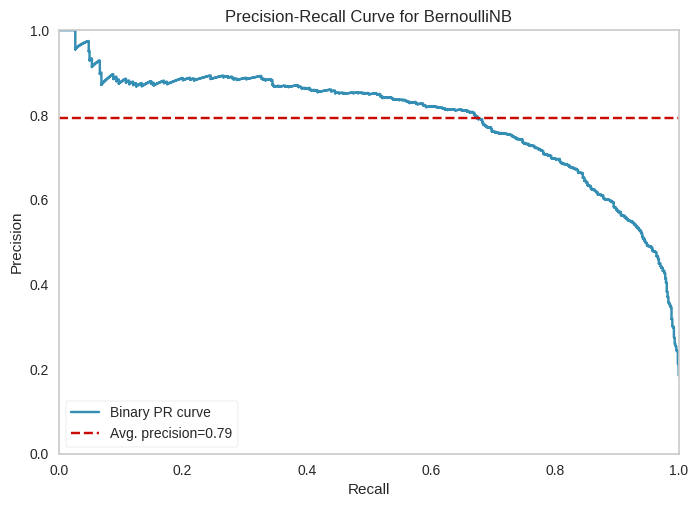

In [76]:
# Create a Precision-Recall Curve visualization for a Bernoulli Naive Bayes model
# with specified hyperparameters
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.6),
    classes=nb.classes_,  # Use classes from a previously defined Naive Bayes model
    per_class=True,       # Plot individual precision-recall curves for each class
    cmap="Set1"           # Set the color map for class differentiation
)

# Fit the Precision-Recall Curve visualization on the TfidfVectorizer transformed training data
viz.fit(X_train_tf_idf, y_train)

# Score the Precision-Recall Curve visualization on the TfidfVectorizer transformed testing data
viz.score(X_test_tf_idf, y_test)

# Display the Precision-Recall Curve visualization
viz.show();


In [77]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [78]:
# Import LinearSVC from sklearn.svm
from sklearn.svm import LinearSVC

# Create a Linear Support Vector Classifier (LinearSVC) model with specified hyperparameters
# C is set to 0.001, class_weight is set to "balanced", random_state is set for reproducibility
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)

# Train the Linear Support Vector Classifier model using the CountVectorizer transformed training data
svc.fit(X_train_count, y_train)


LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [79]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
Confusion Matrix (Test Set):
[[2992  460]
 [ 108  675]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.59      0.86      0.70       783

    accuracy                           0.87      4235
   macro avg       0.78      0.86      0.81      4235
weighted avg       0.90      0.87      0.87      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [80]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.872255
test_precision-1    0.608898
test_recall-1       0.865543
test_f1-1           0.714780
dtype: float64

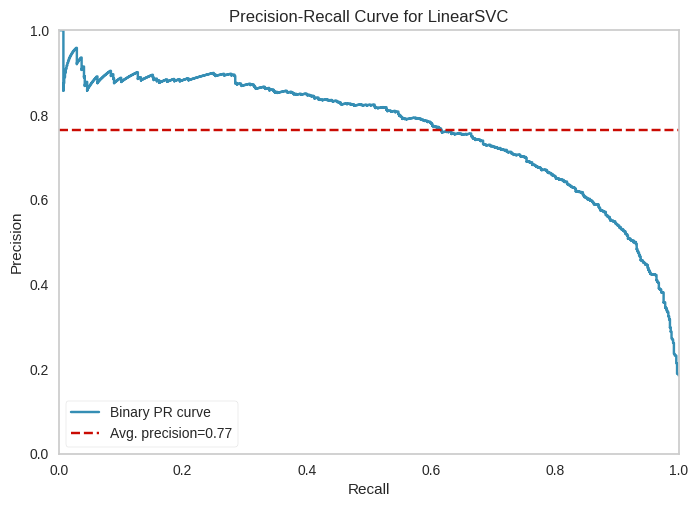

In [81]:
# Create a Precision-Recall Curve visualization for a Linear Support Vector Classifier (LinearSVC) model
# with specified hyperparameters
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
    classes=svc.classes_,  # Use classes from a previously defined LinearSVC model
    per_class=True,        # Plot individual precision-recall curves for each class
    cmap="Set1"            # Set the color map for class differentiation
)

# Fit the Precision-Recall Curve visualization on the CountVectorizer transformed training data
viz.fit(X_train_count, y_train)

# Score the Precision-Recall Curve visualization on the CountVectorizer transformed testing data
viz.score(X_test_count, y_test)

# Display the Precision-Recall Curve visualization
viz.show();


In [82]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [83]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [84]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
Confusion Matrix (Test Set):
[[3022  430]
 [  94  689]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3452
           1       0.62      0.88      0.72       783

    accuracy                           0.88      4235
   macro avg       0.79      0.88      0.82      4235
weighted avg       0.90      0.88      0.88      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     13809
           1       0.66      0.93      0.77      3131

    accuracy                           0.90     16940
   macro avg       0.82      0.91      0.85     16940
weighted avg       0.92      0.90      0.90     16940



In [85]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.882645
test_precision-1    0.630400
test_recall-1       0.883747
test_f1-1           0.735807
dtype: float64

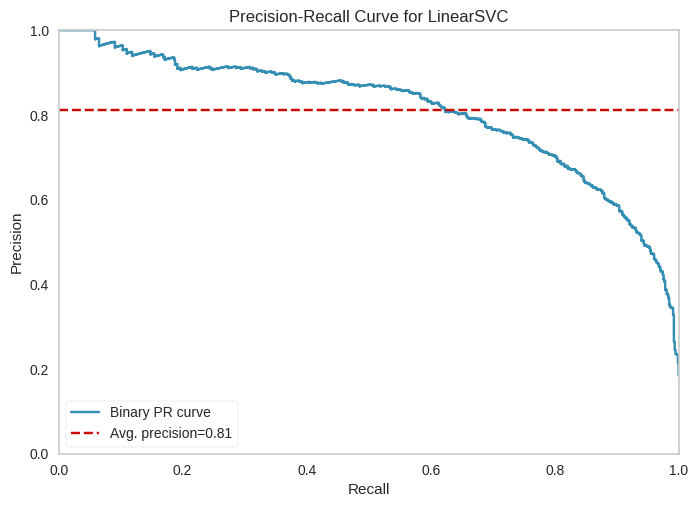

In [86]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [87]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [89]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
Confusion Matrix (Test Set):
[[3001  451]
 [ 141  642]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3452
           1       0.59      0.82      0.68       783

    accuracy                           0.86      4235
   macro avg       0.77      0.84      0.80      4235
weighted avg       0.89      0.86      0.87      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13809
           1       0.64      0.88      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.89      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [90]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.860685
test_precision-1    0.589998
test_recall-1       0.809327
test_f1-1           0.682366
dtype: float64

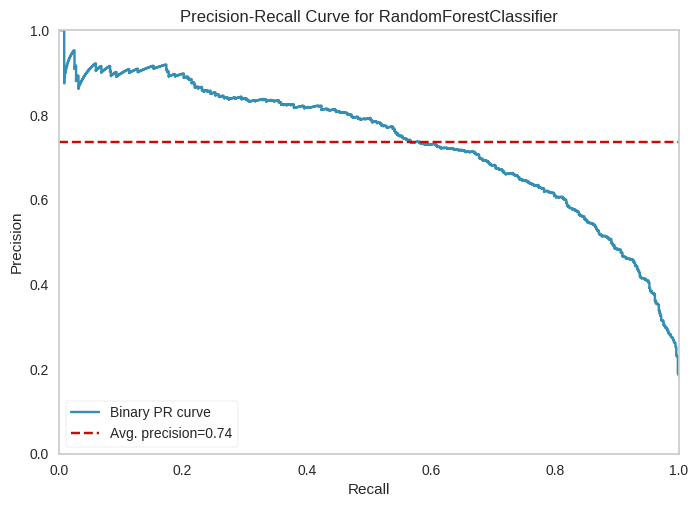

In [91]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [92]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [93]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [94]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
Confusion Matrix (Test Set):
[[2956  496]
 [ 145  638]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3452
           1       0.56      0.81      0.67       783

    accuracy                           0.85      4235
   macro avg       0.76      0.84      0.78      4235
weighted avg       0.88      0.85      0.86      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     13809
           1       0.62      0.90      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [95]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.848583
test_precision-1    0.563920
test_recall-1       0.801016
test_f1-1           0.661677
dtype: float64

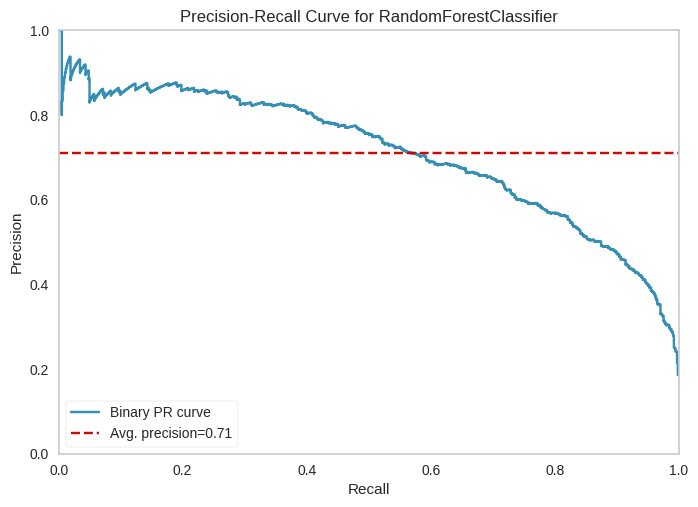

In [96]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [97]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [98]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [99]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
Confusion Matrix (Test Set):
[[3299  153]
 [ 294  489]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3452
           1       0.76      0.62      0.69       783

    accuracy                           0.89      4235
   macro avg       0.84      0.79      0.81      4235
weighted avg       0.89      0.89      0.89      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13809
           1       0.86      0.72      0.78      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.85      0.87     16940
weighted avg       0.92      0.93      0.92     16940



In [100]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.900354
test_precision-1    0.780605
test_recall-1       0.641328
test_f1-1           0.703990
dtype: float64

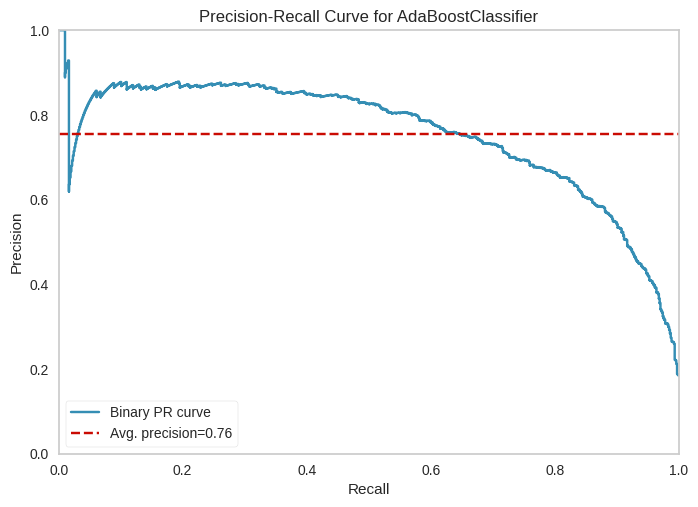

In [101]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [102]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [103]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [104]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
Confusion Matrix (Test Set):
[[3287  165]
 [ 311  472]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3452
           1       0.74      0.60      0.66       783

    accuracy                           0.89      4235
   macro avg       0.83      0.78      0.80      4235
weighted avg       0.88      0.89      0.88      4235

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13809
           1       0.83      0.67      0.74      3131

    accuracy                           0.91     16940
   macro avg       0.88      0.82      0.84     16940
weighted avg       0.91      0.91      0.91     16940



In [105]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.895041
test_precision-1    0.781137
test_recall-1       0.602047
test_f1-1           0.679538
dtype: float64

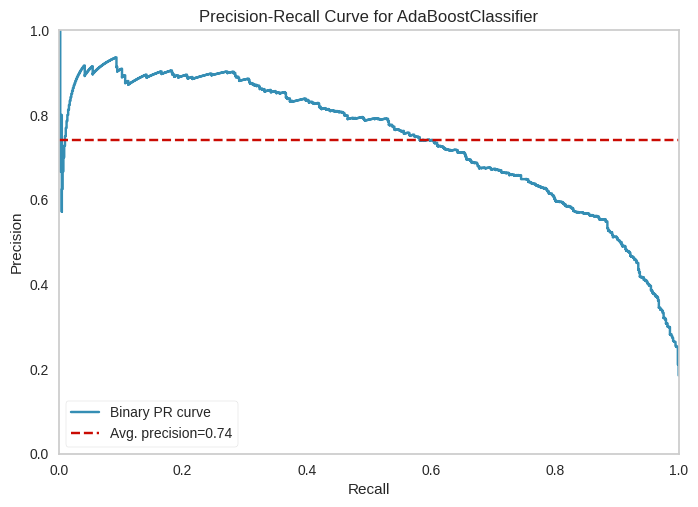

In [106]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [107]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [109]:
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


In [110]:
df.shape

(21175, 2)

### Tokenization

In [111]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız.
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [112]:
tokenizer.fit_on_texts(X)

### Creating word index

In [113]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [114]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [115]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [116]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [117]:
print(X_num_tokens[100])

[1, 80, 6, 473, 30, 5, 6, 390, 2, 24, 1, 1909, 486, 47, 3, 21, 5, 2, 238, 2140, 198, 190, 545, 14, 90, 3, 870, 311, 4, 276, 108, 5, 74, 124, 8, 22, 30, 2, 240, 31, 4, 46, 9, 76, 102, 151, 5, 6, 1, 2848, 78, 149, 9, 1, 204, 2, 43, 318, 7, 25, 4, 264, 264]


### Maximum number of tokens for all documents¶

In [118]:
len(X_num_tokens[100])

63

In [119]:
len(X_num_tokens[150])

30

In [120]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [121]:
num_tokens.mean()

60.2330106257379

In [122]:
num_tokens.max()

116

In [123]:
num_tokens.argmax()

15213

In [124]:
X[15213]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [125]:
max_tokens = 116

In [126]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [127]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [128]:
X_pad.shape

(21175, 116)

In [129]:
np.array(X_num_tokens[500])

array([   2,  104,    7,   18,   11,    3,  280,  358,    9,    5,    2,
         92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908, 3320,
          2,  285,  228,   54,    2,  347,   24,   68,    7,   57,    3,
       1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,  166,
         34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,   12,
          4,  320,  576,   74,  124,    8,   22,    2,   38,  734,  308,
        687,  868,    3,    2,   68,   17,  383,   22,  407,    7,  116,
         17,   95,   48,   51,   46])

In [130]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    2,  104,    7,   18,   11,    3,  280,  358,    9,    5,
          2,   92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908,
       3320,    2,  285,  228,   54,    2,  347,   24,   68,    7,   57,
          3, 1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,
        166,   34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,
         12,    4,  320,  576,   74,  124,    8,   22,    2,   38,  734,
        308,  687,  868,    3,    2,   68,   17,  383,   22,  407,    7,
        116,   17,   95,   48,   51,   46], dtype=int32)

In [131]:
np.array(X_num_tokens[15213])

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4])

In [132]:
X_pad[15213]

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4], dtype=int32)

### Train Set Split

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [135]:
model = Sequential()

In [136]:
embedding_size = 50

In [137]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(GRU(units=48, return_sequences=True))
#model.add(Dropout(0.5))
#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.5))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [138]:
optimizer = Adam(lr=0.001)

In [139]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [140]:
model.summary()
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750000    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 769753 (2.94 MB)
Trainable params: 769753 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose=1, patience = 2, restore_best_weights=True)

In [142]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [143]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
149/149 [==============================] - 37s 207ms/step - loss: 0.4601 - recall: 0.7193 - val_loss: 0.3239 - val_recall: 0.8926
Epoch 2/25
149/149 [==============================] - 30s 201ms/step - loss: 0.2325 - recall: 0.9231 - val_loss: 0.2401 - val_recall: 0.8133
Epoch 3/25
149/149 [==============================] - 30s 199ms/step - loss: 0.1706 - recall: 0.9517 - val_loss: 0.2556 - val_recall: 0.7698
Epoch 3: early stopping


### Model evaluation

In [144]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.460136,0.719273,0.323944,0.892583
1,0.232532,0.923077,0.240055,0.813299
2,0.170612,0.951746,0.255554,0.769821


<Axes: >

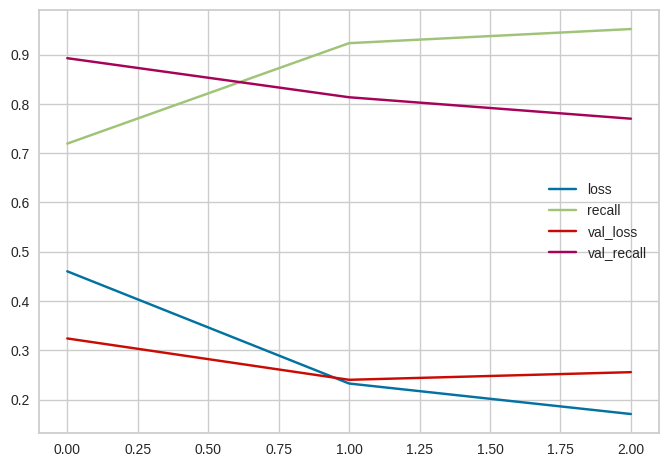

In [145]:
model_loss.plot()

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 16s 26ms/step
[[13677  1857]
 [  228  3295]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.64      0.94      0.76      3523

    accuracy                           0.89     19057
   macro avg       0.81      0.91      0.84     19057
weighted avg       0.92      0.89      0.90     19057



In [147]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 2s 23ms/step
[[1475  252]
 [  42  349]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1727
           1       0.58      0.89      0.70       391

    accuracy                           0.86      2118
   macro avg       0.78      0.87      0.81      2118
weighted avg       0.90      0.86      0.87      2118



In [148]:
from sklearn.metrics import precision_recall_curve, average_precision_score

67/67 [==============================] - 2s 25ms/step


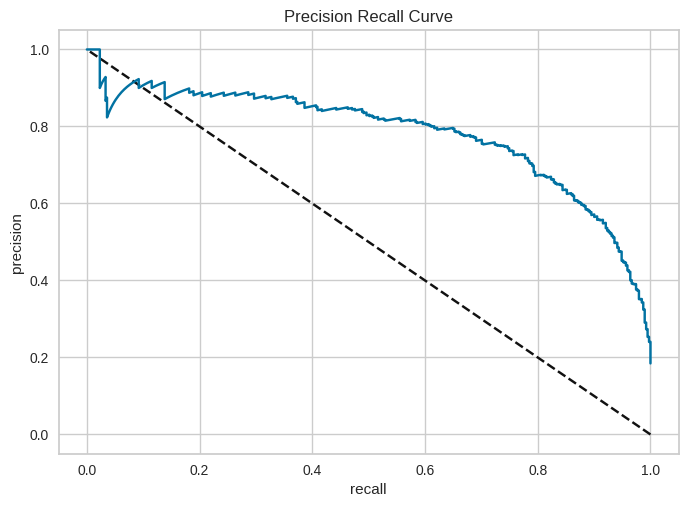

In [149]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [150]:
average_precision_score(y_test, y_pred_proba)

0.7830879676313987

In [151]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [152]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.9 MB/s eta 0:00:00


### Tokenization

In [153]:
# Import NumPy library for numerical operations
import numpy as np

# Import Pandas library for data manipulation and analysis
import pandas as pd


In [154]:
# Import AutoTokenizer from the transformers library
from transformers import AutoTokenizer

# Load the BERT tokenizer with the "bert-base-uncased" pre-trained model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Initialize a variable to keep track of the maximum token length
max_len = 0

# Create an empty list to store the maximum token length for each sentence
max_token = []

# Iterate through each sentence in the dataset (assumed to be stored in variable X)
for sent in X:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens
    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True)

    # Append the length of the tokenized sentence to the list
    max_token.append(len(input_ids))

    # Update the maximum sentence length if the current sentence is longer
    max_len = max(max_len, len(input_ids))

# Print the overall maximum sentence length
print('Max sentence length: ', max_len)


(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [155]:
# Calculate and print the mean of the maximum token lengths for all sentences
average_token_length = np.array(max_token).mean()
print('Average token length: ', average_token_length)

Average token length:  76.31556080283353


In [159]:
sum(np.array(max_token) <= 162) / len(max_token)


1.0

In [ ]:
# Calculate the percentage of sentences with a maximum token length less than or equal to 162
percentage_short_sentences = sum(np.array(max_token) <= 162) / len(max_token)

# Print the calculated percentage
print('Percentage of sentences with max token length <= 162: {:.2%}'.format(percentage_short_sentences))


In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))


  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [ ]:
Xids, Xmask = transformation(X)

In [ ]:
Xids.shape

(21175, 162)

In [ ]:
Xmask.shape

(21175, 162)

In [ ]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

### Transformation text to tensor (Matrix to Tensor)

In [ ]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [ ]:
batch_size = 32

# shuffle and batch
# fit into a batch of 16
dataset = dataset.shuffle(21500, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

### Train test split

In [ ]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

### AdamW optimization

In [ ]:
!pip install -q tf-models-official

     |████████████████████████████████| 2.2 MB 5.4 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 47.8 MB 67 kB/s 
     |████████████████████████████████| 4.9 MB 50.4 MB/s 
     |████████████████████████████████| 636 kB 49.0 MB/s 
     |████████████████████████████████| 90 kB 8.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.1 MB/s 
     |████████████████████████████████| 1.2 MB 52.5 MB/s 
     |████████████████████████████████| 99 kB 8.6 MB/s 
     |████████████████████████████████| 352 kB 47.9 MB/s 
     |████████████████████████████████| 237 kB 53.7 MB/s 
     |████████████████████████████████| 462 kB 55.4 MB/s 


In [ ]:
from official.nlp import optimization
epochs = 1
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(162, activation='relu')(embeddings)
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():

  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [ ]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs)

594/594 [==============================] - 134s 106ms/step - loss: 0.2288 - recall_8: 0.7022 - val_loss: 0.1517 - val_recall_8: 0.8658


## Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1764
           1       0.85      0.87      0.86       380

    accuracy                           0.95      2144
   macro avg       0.91      0.92      0.91      2144
weighted avg       0.95      0.95      0.95      2144



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     15482
           1       0.89      0.89      0.89      3526

    accuracy                           0.96     19008
   macro avg       0.93      0.93      0.93     19008
weighted avg       0.96      0.96      0.96     19008



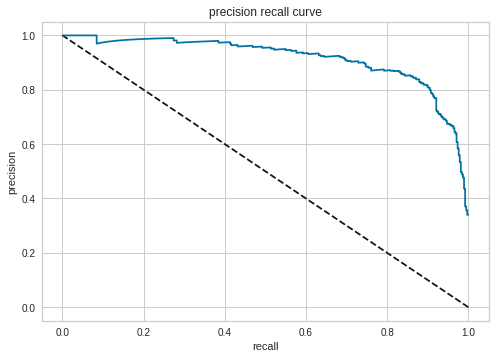

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.9159377028856752

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

## BERT Model with Weighted

In [ ]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [ ]:
weights = {0:0.2, 1:0.8}

In [ ]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

594/594 [==============================] - 133s 106ms/step - loss: 0.0831 - recall_9: 0.8536 - val_loss: 0.1823 - val_recall_9: 0.9273


In [ ]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1745
           1       0.76      0.93      0.83       399

    accuracy                           0.93      2144
   macro avg       0.87      0.93      0.89      2144
weighted avg       0.94      0.93      0.93      2144



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15496
           1       0.80      0.96      0.88      3512

    accuracy                           0.95     19008
   macro avg       0.90      0.95      0.92     19008
weighted avg       0.96      0.95      0.95     19008



In [ ]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

0.9142262651259666

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

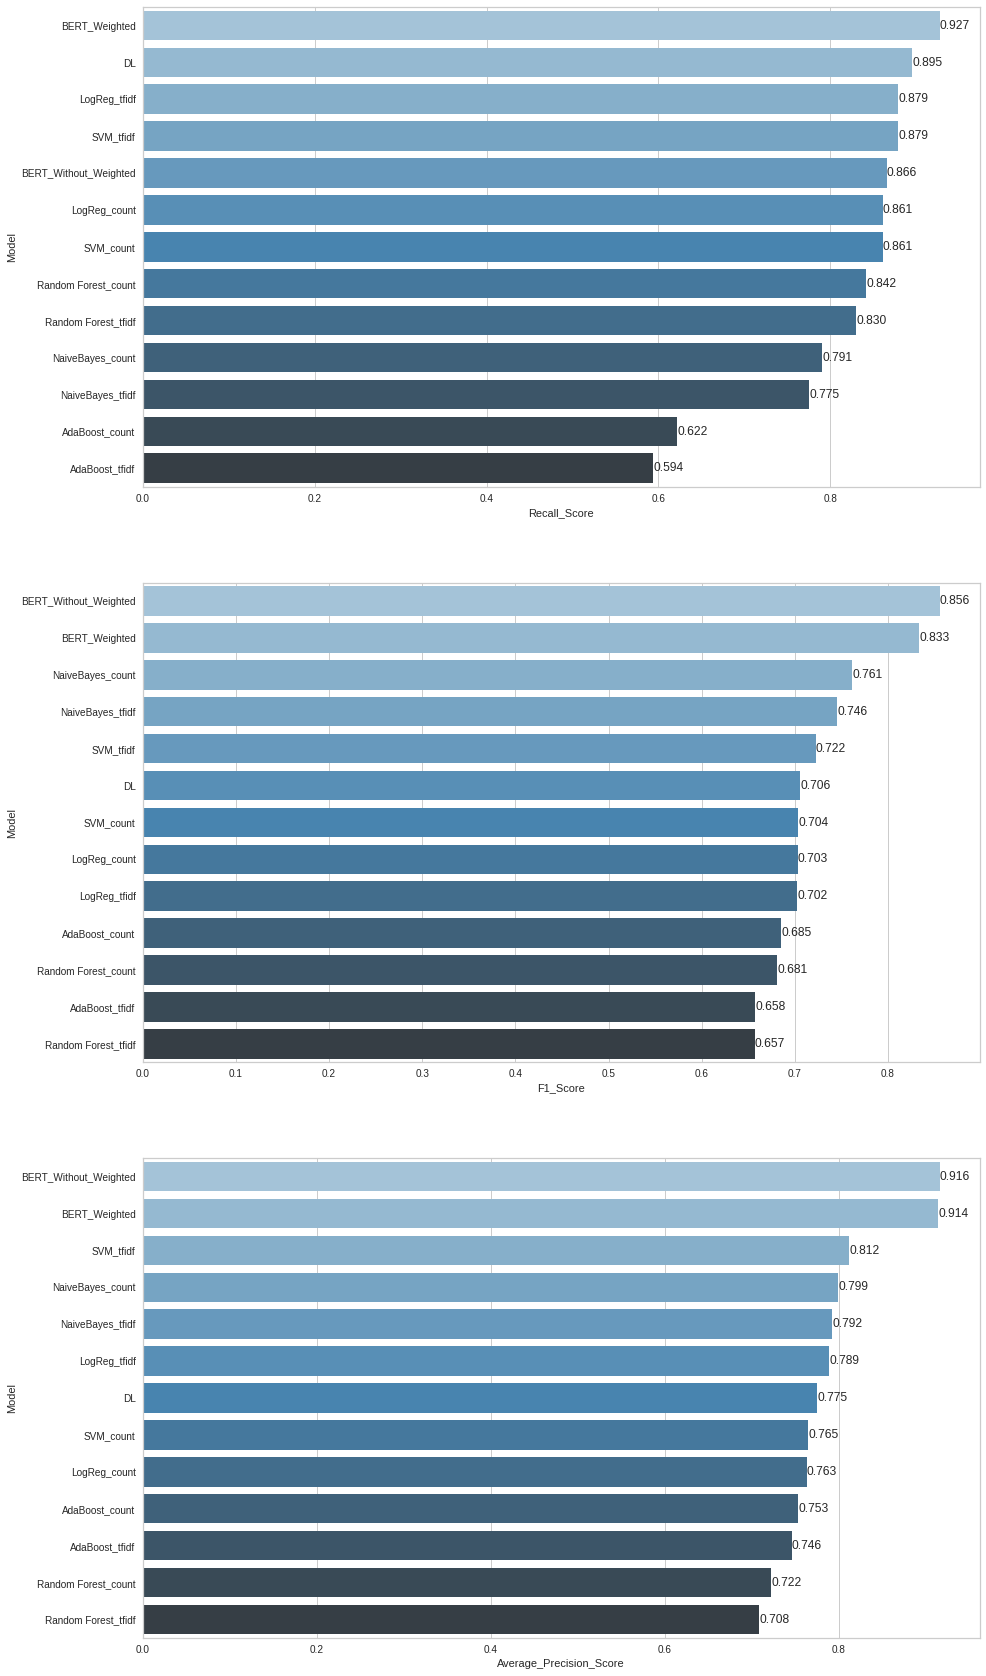

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec,
                                                   rf_count_rec, ada_count_rec,
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec,
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})

def labels(ax):

    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

In [ ]:
## BERT Large Uncased

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  162


In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))


  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [ ]:
Xids, Xmask = transformation(X)

In [ ]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [ ]:
batch_size = 32

# shuffle and batch
# fit into a batch of 16
dataset = dataset.shuffle(21500, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

In [ ]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

In [ ]:
!pip install -q tf-models-official

In [ ]:
from official.nlp import optimization
epochs = 1
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-large-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(162, activation='relu')(embeddings)
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():

  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  335141888   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [ ]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs)

594/594 [==============================] - 277s 257ms/step - loss: 0.2023 - recall: 0.7687 - val_loss: 0.1582 - val_recall: 0.8623


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1759
           1       0.86      0.86      0.86       385

    accuracy                           0.95      2144
   macro avg       0.91      0.92      0.91      2144
weighted avg       0.95      0.95      0.95      2144



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15485
           1       0.92      0.90      0.91      3523

    accuracy                           0.97     19008
   macro avg       0.95      0.94      0.94     19008
weighted avg       0.97      0.97      0.97     19008



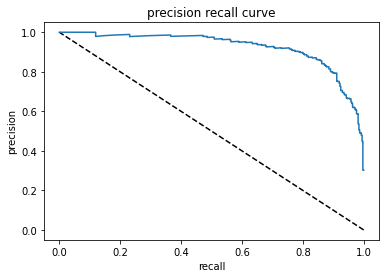

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.9250566165979566

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___